## Atividade2 : Implementando uma Adeline

Discente: Luiz Henrique Pereira Niero
Docente: Prof. Dr. LucasC. Ribas
PPGCC - Unesp - 2025
Disciplina: Rdes Neurais Artificiais

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
class Adaline:
    def __init__ (self, x_train, y_train, tx_aprendizado, num_epocas, e, treinamento_offline):
        self.x_train = np.insert(x_train, 0, -1, axis=1) # Adicionando o BIAS
        self.y_train = y_train
        self.tx_aprendizagem = tx_aprendizado
        self.qtde_epocas = num_epocas
        self.treinamento_offline = treinamento_offline
        self.e = e
        
        self.quantidade_elementos_treino = self.x_train.shape[0]
        self.quantidade_atributos = self.x_train.shape[1]
        self.w = np.random.uniform(0, 0.2, size=self.quantidade_atributos)
        self.limiar = random.uniform(0, 0.2) # ponto flutuante entre 0 e 0.2
        self.quadrados_erros_epocas = []
        self.w_epocas = []
        

    def continua_treino(self, erro_atual, erro_anterior):
        if abs(erro_atual - erro_anterior) <= self.e:
            return 0
        else:
            return 1


    def treina_elemento(self, indice):
        y = self.y_train[indice]
        x = self.x_train[indice]
        u = np.dot(x, self.w)
        erro = y - u
        deltaw = self.tx_aprendizagem * erro * x
        self.w += deltaw
        return erro   


    def treina_batch(self, epoca):
        soma_delta_w = np.zeros_like(self.w)
        erro_quadrado_total = 0
    
        # Para cada exemplo do conjunto de treinamento:
        for i in range(self.quantidade_elementos_treino):
            y = self.y_train[i]         # rótulo esperado
            x = self.x_train[i]         # exemplo com bias já incluído
            u = np.dot(x, self.w)       # saída linear
            erro = y - u              # erro de predição
            soma_delta_w += self.tx_aprendizagem * erro * x  # acumula ajuste do peso
            erro_quadrado_total += erro ** 2                  # acumula o erro quadrático
    
        self.w += soma_delta_w
        eqm_epoca = erro_quadrado_total / self.quantidade_elementos_treino
        self.w_epocas.append(self.w.copy())
        
        return eqm_epoca

      
        

    def treina_epoca(self, epoca):
        if self.treinamento_offline:
            eqm_epoca = self.treina_batch(epoca)
        else:
            erro_quadrado_total = 0
            for i in range(self.quantidade_elementos_treino):
                erro = self.treina_elemento(i)
                erro_quadrado_total += erro ** 2
            eqm_epoca = erro_quadrado_total / self.quantidade_elementos_treino
            self.w_epocas.append(self.w.copy())
            
        return eqm_epoca

    
    def treina(self):
        eqm_epoca = 1000      
        for epoca in range(self.qtde_epocas):
            eqm_epoca_anterior = eqm_epoca            
            eqm_epoca = self.treina_epoca(epoca)
            self.quadrados_erros_epocas.append(eqm_epoca)
            if not self.continua_treino(eqm_epoca, eqm_epoca_anterior):
                break;
            

        print("\r\n --- Resultados do treinamento --- ")
        melhor_epoca =  self.quadrados_erros_epocas.index(min(self.quadrados_erros_epocas))
        melhor_w = self.w_epocas[melhor_epoca]
        
        eqm_melhor_epoca = self.quadrados_erros_epocas[melhor_epoca]
        
        print(f"Melhor época: {melhor_epoca}")
        print(f"Eqm da melhor época: {eqm_melhor_epoca}")        
        print(f"Melhores pesos: {melhor_w}")
  
        epocas = range(1, len(self.quadrados_erros_epocas) + 1)
        
        plt.plot(epocas, self.quadrados_erros_epocas, marker='o', linestyle='-')
        plt.xlabel('Épocas')
        plt.ylabel('Erro')
        plt.title('Eqm ao longo das Épocas de Treinamento')
        plt.grid(True)
        plt.show()

    
    def testa(self, x_test, y_test):
        melhor_epoca =  self.quadrados_erros_epocas.index(min(self.quadrados_erros_epocas))
        melhor_w = self.w_epocas[melhor_epoca]
        x_test_bias = np.insert(x_test, 0, -1, axis=1)
        
        quantidade_elementos_teste = x_test_bias.shape[0]
        acertos = 0
        
        for i in range (quantidade_elementos_teste):
            y_esperado = y_test[i] # Valor esperado
            u = np.dot(x_test_bias[i], melhor_w)

            # Função degrau g(xw)
            if (u >= 0):
                gu = 1
            else:
                gu = -1

            # Verifica se acertou ou errou a predição do elemento i
            if gu == y_esperado:
                acertos += 1

        print("Resultados dos testes : ")
        print(f"Total de elementos: {quantidade_elementos_teste}")
        print(f"Total de predições corretas: {acertos}")
        print(f"Taxa de acertos: {acertos / quantidade_elementos_teste}")
    

    def plota_grafico(self, X, Y, titulo):
        melhor_epoca = self.quadrados_erros_epocas.index(min(self.quadrados_erros_epocas))
        w = self.w_epocas[melhor_epoca]
        
        # Definindo um intervalo para x1 baseado nos dados
        x1_min = X[:, 0].min() - 1
        x1_max = X[:, 0].max() + 1

        # dimensões x1 e x2 da linha
        linha_x1 = np.linspace(x1_min, x1_max, 100)
        linha_x2 = (w[0] - w[1] * linha_x1 ) / w[2]
        
        # Separando os pontos por classe para melhor visualização
        X_pos = X[Y == 1]
        X_neg = X[Y == -1]
        
        plt.figure(figsize=(8, 6))
        plt.scatter(X_pos[:, 0], X_pos[:, 1], color='blue', label='Classe 1')
        plt.scatter(X_neg[:, 0], X_neg[:, 1], color='red', label='Classe -1')
        
        # Plotando a reta de decisão
        plt.plot(linha_x1, linha_x2, 'k-', label='Reta de decisão')
        
        plt.xlabel('Atributo 1')
        plt.ylabel('Atributo 2')
        plt.title(f'Elementos e reta de Separação do Adaline - {titulo}')
        plt.legend()
        plt.grid(True)
        plt.show()

### DATASET 1


 --- Resultados do treinamento --- 
Melhor época: 32
Eqm da melhor época: 0.2704637330769072
Melhores pesos: [-0.00297812 -0.69680316  0.78825799]


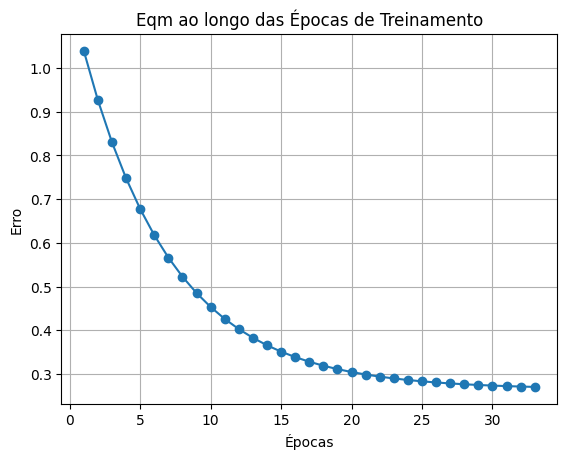

Resultados dos testes : 
Total de elementos: 140
Total de predições corretas: 134
Taxa de acertos: 0.9571428571428572


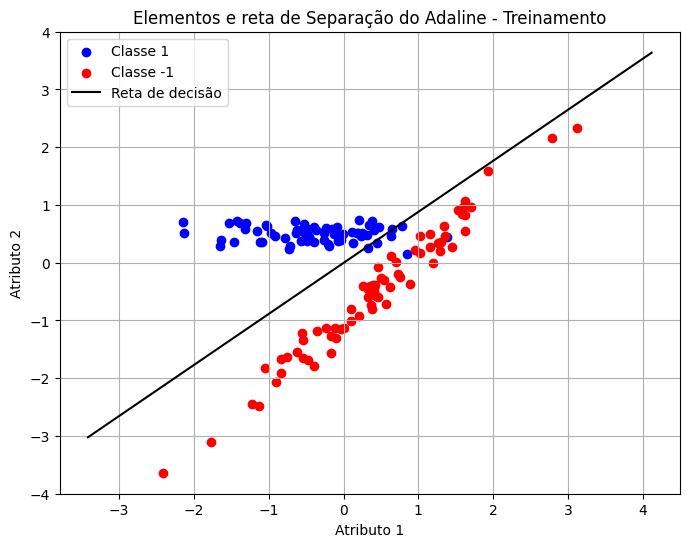

Resultados dos testes : 
Total de elementos: 60
Total de predições corretas: 57
Taxa de acertos: 0.95


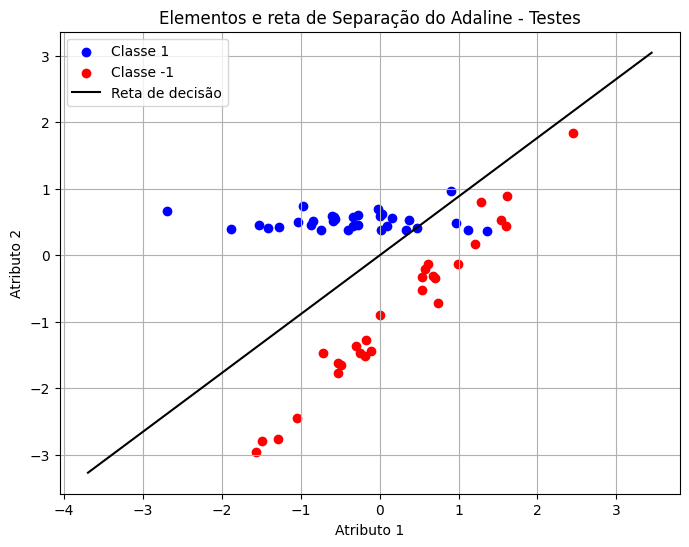

In [3]:
dataset_treinamento = 'perceptron_datasets\\train_dataset1.csv'
dataset_testes = 'perceptron_datasets\\test_dataset1.csv'

df_train_loaded = pd.read_csv(dataset_treinamento)
df_test_loaded = pd.read_csv(dataset_testes)

x_train = df_train_loaded.drop('label', axis=1).values
y_train = df_train_loaded['label'].values

x_test = df_test_loaded.drop('label', axis=1).values
y_test = df_test_loaded['label'].values


# Recebe um vetor X e o valor previsto Y e atualiza os parâmetros W e Bias.
adaline1 = Adaline(x_train = x_train,
                   y_train = y_train,
                   tx_aprendizado = 0.001,
                   num_epocas = 100,
                   e = 0.001,
                   treinamento_offline = 0)
adaline1.treina()
adaline1.testa(x_train, y_train)
adaline1.plota_grafico(x_train, y_train, 'Treinamento')

adaline1.testa(x_test, y_test)
adaline1.plota_grafico(x_test, y_test, 'Testes')


 --- Resultados do treinamento --- 
Melhor época: 0
Eqm da melhor época: 1.0239566381636704
Melhores pesos: [-2.10008348 -6.3419927   6.22350777]


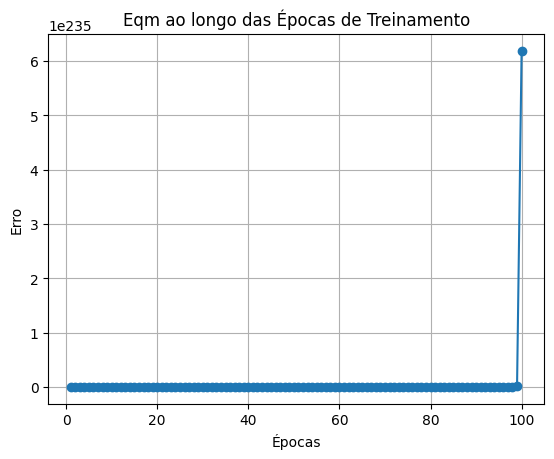

Resultados dos testes : 
Total de elementos: 140
Total de predições corretas: 138
Taxa de acertos: 0.9857142857142858


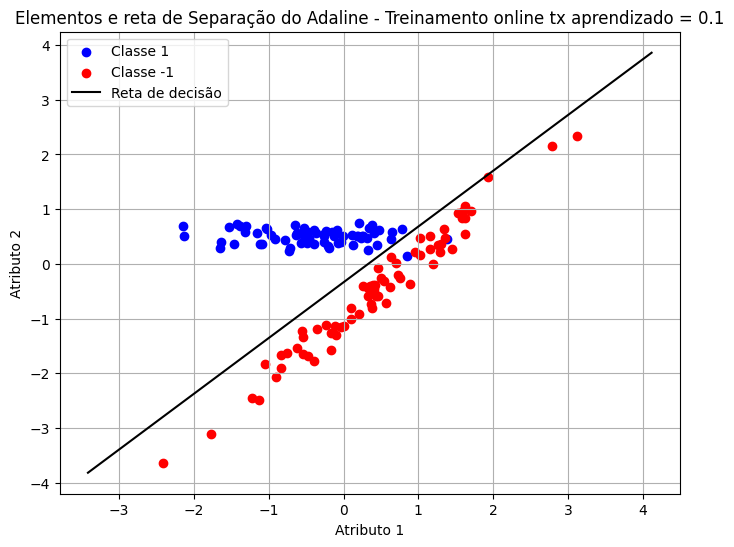

Resultados dos testes : 
Total de elementos: 60
Total de predições corretas: 57
Taxa de acertos: 0.95


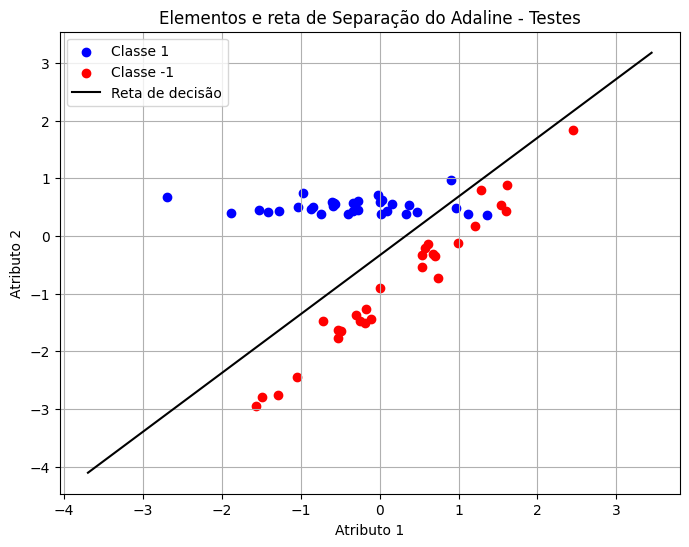

In [4]:
### Treinando com o método batch e uma taxa de aprendizado maior.

adaline1batch = Adaline(x_train = x_train,
                   y_train = y_train,
                   tx_aprendizado = 0.1,
                   num_epocas = 100,
                   e = 0.01,
                   treinamento_offline = 1)
adaline1batch.treina()
adaline1batch.testa(x_train, y_train)
adaline1batch.plota_grafico(x_train, y_train, 'Treinamento online tx aprendizado = 0.1')

adaline1batch.testa(x_test, y_test)
adaline1batch.plota_grafico(x_test, y_test, 'Testes')

### DATASET 2


 --- Resultados do treinamento --- 
Melhor época: 9
Eqm da melhor época: 1.0079677506778053
Melhores pesos: [0.00594163 0.02950617 0.07564439]


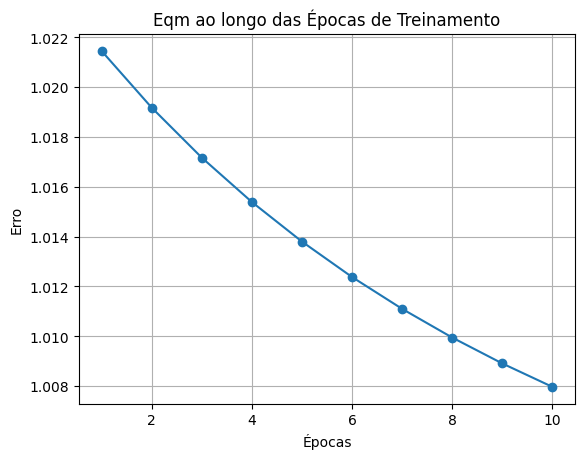

Resultados dos testes : 
Total de elementos: 175
Total de predições corretas: 69
Taxa de acertos: 0.3942857142857143


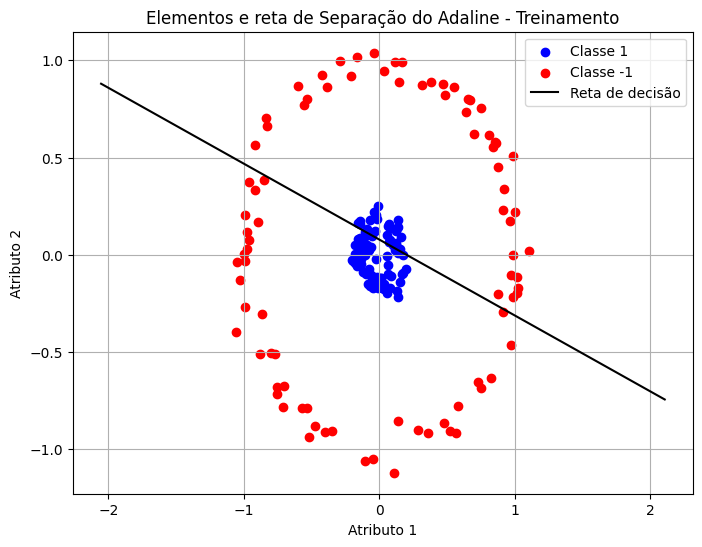

Resultados dos testes : 
Total de elementos: 75
Total de predições corretas: 33
Taxa de acertos: 0.44


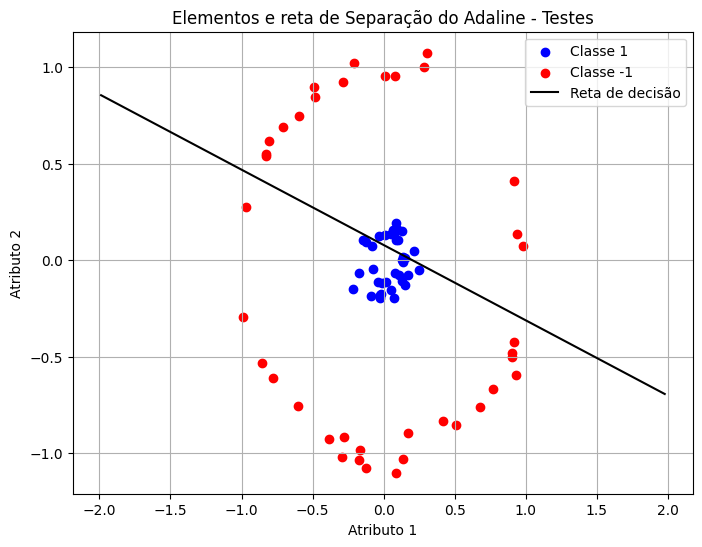

In [5]:
dataset_treinamento_2 = 'perceptron_datasets\\train_dataset2.csv'
dataset_testes_2 = 'perceptron_datasets\\test_dataset2.csv'

df_train_loaded_2 = pd.read_csv(dataset_treinamento_2)
df_test_loaded_2 = pd.read_csv(dataset_testes_2)

x_train_2 = df_train_loaded_2.drop('label', axis=1).values
y_train_2 = df_train_loaded_2['label'].values

x_test_2 = df_test_loaded_2.drop('label', axis=1).values
y_test_2 = df_test_loaded_2['label'].values

adaline2 = Adaline(x_train = x_train_2,
                   y_train = y_train_2,
                   tx_aprendizado = 0.001,
                   num_epocas = 100,
                   e = 0.001,
                   treinamento_offline = 0)

adaline2.treina()
adaline2.testa(x_train_2, y_train_2)
adaline2.plota_grafico(x_train_2, y_train_2, 'Treinamento')

adaline2.testa(x_test_2, y_test_2)
adaline2.plota_grafico(x_test_2, y_test_2, 'Testes')

### DATASET 3


 --- Resultados do treinamento --- 
Melhor época: 3
Eqm da melhor época: 0.46114966132346763
Melhores pesos: [ 0.04708623  0.09500756 -0.04094813  0.02836339 -0.0148415  -0.0236812
  0.1031609   0.05177729  0.12400195  0.04011385  0.40219053]


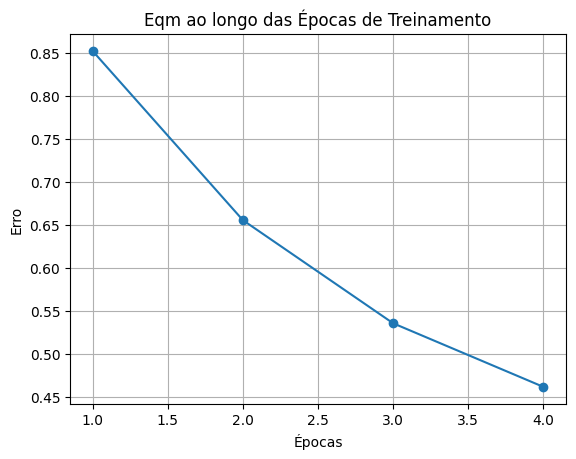

Resultados dos testes : 
Total de elementos: 147
Total de predições corretas: 134
Taxa de acertos: 0.9115646258503401
Resultados dos testes : 
Total de elementos: 63
Total de predições corretas: 54
Taxa de acertos: 0.8571428571428571


In [6]:
dataset_treinamento_3 = 'perceptron_datasets\\train_dataset3.csv'
dataset_testes_3 = 'perceptron_datasets\\test_dataset3.csv'

df_train_loaded_3 = pd.read_csv(dataset_treinamento_3)
df_test_loaded_3 = pd.read_csv(dataset_testes_3)

x_train_3 = df_train_loaded_3.drop('label', axis=1).values
y_train_3 = df_train_loaded_3['label'].values

x_test_3 = df_test_loaded_3.drop('label', axis=1).values
y_test_3 = df_test_loaded_3['label'].values

adaline3 = Adaline(x_train = x_train_3,
                   y_train = y_train_3,
                   tx_aprendizado = 0.001,
                   num_epocas = 100,
                   e = 0.1,
                   treinamento_offline = 0)
adaline3.treina()
adaline3.testa(x_train_3, y_train_3)
adaline3.testa(x_test_3, y_test_3)


 --- Resultados do treinamento --- 
Melhor época: 99
Eqm da melhor época: 0.33714255326452186
Melhores pesos: [ 0.01132411  0.01522204 -0.00268188  0.03319186  0.03446769 -0.01007281
  0.01881976  0.06889567  0.08775915 -0.0314944   0.58192974]


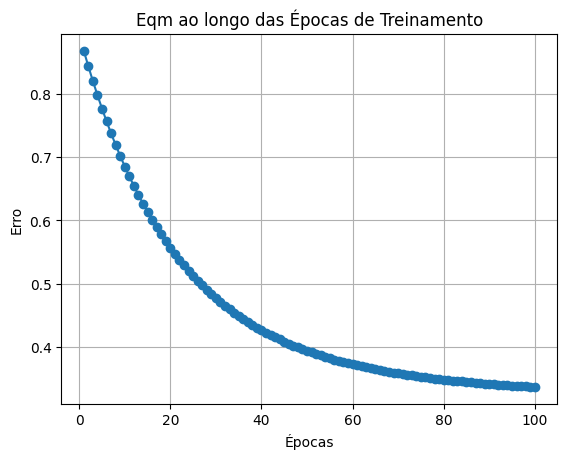

Resultados dos testes : 
Total de elementos: 63
Total de predições corretas: 56
Taxa de acertos: 0.8888888888888888
Resultados dos testes : 
Total de elementos: 147
Total de predições corretas: 136
Taxa de acertos: 0.9251700680272109


In [7]:
adaline3b = Adaline(x_train = x_train_3,
                   y_train = y_train_3,
                   tx_aprendizado = 0.0001,
                   num_epocas = 100,
                   e = 0.0001,
                   treinamento_offline = 0)
adaline3b.treina()
adaline3b.testa(x_test_3, y_test_3)
adaline3b.testa(x_train_3, y_train_3)


 --- Resultados do treinamento --- 
Melhor época: 3
Eqm da melhor época: 0.44650955273207354
Melhores pesos: [0.0299914  0.0005754  0.04476737 0.00103985 0.08032231 0.06618718
 0.10235354 0.04757388 0.03480999 0.0318525  0.4785335 ]


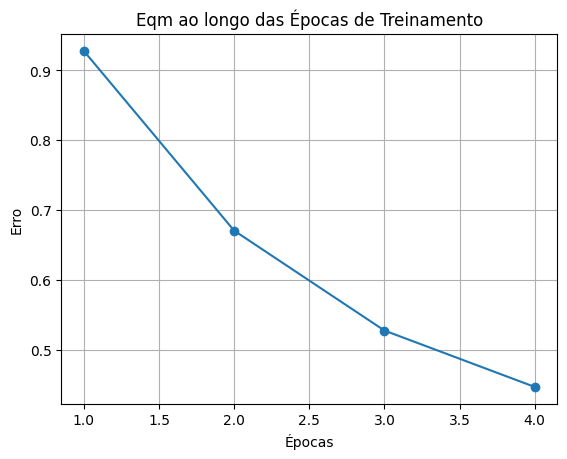

Resultados dos testes : 
Total de elementos: 147
Total de predições corretas: 134
Taxa de acertos: 0.9115646258503401
Resultados dos testes : 
Total de elementos: 63
Total de predições corretas: 54
Taxa de acertos: 0.8571428571428571


In [8]:
# Treinamento offline

adaline3_batch = Adaline(x_train = x_train_3,
                   y_train = y_train_3,
                   tx_aprendizado = 0.001,
                   num_epocas = 100,
                   e = 0.1,
                   treinamento_offline = 1)
adaline3_batch.treina()
adaline3_batch.testa(x_train_3, y_train_3)
adaline3_batch.testa(x_test_3, y_test_3)

## Comentários sobre os resultados obtidos

Quando utilizamos uma taxa de aprendizagem alta, o erro quadrático não se comporta como esperado.

Quando utilizamos uma taxa de aprendizagem boa (0.001) e o treinamento online, o modelo tende a convergir em menos épocas, porém, o resultado não é tão bom quanto o treinamento por batch, que utiliza mais épocas mas apresenta um erro menor.